# Load the necessary libraries. Import and load the dataset with a name uber_drives .

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv("Project Week1.csv")

data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'])
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'])
data['ROUTE*'] = data['START*'] + '-' + data['STOP*']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
 7   ROUTE*       1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 72.3+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,1155.0,10.56684,21.579106,0.5,2.9,6.0,10.4,310.3


## Q1. Show the last 10 records of the dataset. (2 point)

In [7]:
data.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUTE*
1145,2016-12-30 10:15:00,2016-12-30 10:33:00,Business,Karachi,Karachi,2.8,Errand/Supplies,Karachi-Karachi
1146,2016-12-30 11:31:00,2016-12-30 11:56:00,Business,Karachi,Karachi,2.9,Errand/Supplies,Karachi-Karachi
1147,2016-12-30 15:41:00,2016-12-30 16:03:00,Business,Karachi,Karachi,4.6,Errand/Supplies,Karachi-Karachi
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karachi,Karachi,4.6,Meeting,Karachi-Karachi
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karachi,Karachi,0.8,Customer Visit,Karachi-Karachi
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,Karachi-Karachi
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,Karachi-Unknown Location
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Unknown Location-Unknown Location
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Katunayake-Gampaha
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,Gampaha-Ilukwatta


## Q2. Show the first 10 records of the dataset. (2 points)

In [8]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUTE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce-Fort Pierce
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach


## Q3. Show the dimension(number of rows and columns) of the dataset. (2 points)

In [9]:
data.shape

(1155, 8)

## Q4. Show the size (Total number of elements) of the dataset. (2 points)

In [10]:
data.size

9240

## Q5. Display the information about all the variables of the data set. What can you infer from the output?(1 +2 points)

#### Hint: Information includes - Total number of columns,variable data-types, number of non-null values in a variable, and usage

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
 7   ROUTE*       1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 72.3+ KB


## Q6. Check for missing values. (2 points) 

####  Note: Output should contain only one boolean value

In [12]:
data.isnull().sum() > 0 

START_DATE*    False
END_DATE*      False
CATEGORY*      False
START*         False
STOP*          False
MILES*         False
PURPOSE*        True
ROUTE*         False
dtype: bool

## Q7. How many missing values are present in the entire dataset? (2 points)


In [13]:
data.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
ROUTE*           0
dtype: int64

## Q8. Get the summary of the original data. (2 points).

#### Hint: Summary includes- Count,Mean, Std, Min, 25%,50%,75% and max

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,1155.0,10.56684,21.579106,0.5,2.9,6.0,10.4,310.3




## Q9. Drop the missing values and store the data in a new dataframe (name it"df") (2-points)

#### Note: Dataframe "df" will not contain any missing value

In [15]:
df = data.dropna()

## Q10. Check the information of the dataframe(df). (1 points)

#### Hint: Information includes - Total number of columns,variable data-types, number of non-null values in a variable, and usage

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  653 non-null    datetime64[ns]
 1   END_DATE*    653 non-null    datetime64[ns]
 2   CATEGORY*    653 non-null    object        
 3   START*       653 non-null    object        
 4   STOP*        653 non-null    object        
 5   MILES*       653 non-null    float64       
 6   PURPOSE*     653 non-null    object        
 7   ROUTE*       653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 45.9+ KB


## Q11. Get the unique start locations. (2 points)
#### Note: This question is based on the dataframe with no 'NA' values

In [17]:
df['START*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Lake Wellingborough',
       'Fayetteville Street', 'Raleigh', 'Whitebridge', 'Hazelwood',
       'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill', 'Northwoods',
       'Edgehill Farms', 'Eastgate', 'East Elmhurst', 'Long Island City',
       'Katunayaka', 'Colombo', 'Nugegoda', 'Unknown Location',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Preston',
       'Heritage Pines', 'Tanglewood', 'Waverly Place', 'Wayne Ridge',
       'Westpark Place', 'East Austin', 'The Drag', 'South Congress',
       'Georgian Acres', 'North Austin', 'West University', 'Austin',
       'Katy', 'Sharpstown', 'Sugar Land', 'Galveston', 'Port Bolivar',
       'Washington Avenue',

## Q12. What is the total number of unique start destinations? (2 points)
#### Note: Use the original dataframe without dropping 'NA' values

In [18]:
data['START*'].nunique()

176

## Q13. What is the total number of unique stop locations. (2 points)
#### Note: Use the original dataframe without dropping 'NA' values.

In [19]:
data['STOP*'].nunique()

187

## Q14. Display all Uber trips that has the starting point as San Francisco. (2 points)
#### Note: Use the original dataframe without dropping the 'NA' values.


In [20]:
data[data["START*"] == 'San Francisco']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUTE*
362,2016-05-09 14:39:00,2016-05-09 15:06:00,Business,San Francisco,Palo Alto,20.5,Between Offices,San Francisco-Palo Alto
440,2016-06-14 16:09:00,2016-06-14 16:39:00,Business,San Francisco,Emeryville,11.6,Meeting,San Francisco-Emeryville
836,2016-10-19 14:02:00,2016-10-19 14:31:00,Business,San Francisco,Berkeley,10.8,NaN,San Francisco-Berkeley
917,2016-11-07 19:17:00,2016-11-07 19:57:00,Business,San Francisco,Berkeley,13.2,Between Offices,San Francisco-Berkeley
919,2016-11-08 12:16:00,2016-11-08 12:49:00,Business,San Francisco,Berkeley,11.3,Meeting,San Francisco-Berkeley
927,2016-11-09 18:40:00,2016-11-09 19:17:00,Business,San Francisco,Oakland,12.7,Customer Visit,San Francisco-Oakland
933,2016-11-10 15:17:00,2016-11-10 15:22:00,Business,San Francisco,Oakland,9.9,Temporary Site,San Francisco-Oakland
966,2016-11-15 20:44:00,2016-11-15 21:00:00,Business,San Francisco,Berkeley,11.8,Temporary Site,San Francisco-Berkeley


## Q15. What is the most popular starting point for the Uber drivers? (2 points)
#### Note: Use the original dataframe without dropping the 'NA' values.

#### Hint:Popular means the place that is visited the most

In [21]:
data['START*'].value_counts()

Cary                 201
Unknown Location     148
Morrisville           85
Whitebridge           68
Islamabad             57
                    ... 
Ridgeland              1
Daytona Beach          1
Sky Lake               1
Sand Lake Commons      1
Gampaha                1
Name: START*, Length: 176, dtype: int64

## Q16. What is the most popular dropping point for the Uber drivers? (2 points)
#### Note: Use the original dataframe without dropping the 'NA' values.

#### Hint: Popular means the place that is visited the most

In [22]:
data['STOP*'].value_counts()

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP*, Length: 187, dtype: int64

## Q17. What is the most frequent route taken by Uber drivers. (3 points)
#### Note: This question is based on the new dataframe with no 'na' values.
#### Hint-Print the most frequent route taken by Uber drivers (Route= combination of START & END points present in the Data set).

In [23]:
df['ROUTE*'] = df['START*'] + "-" + df['STOP*']

In [24]:
df['ROUTE*'].value_counts()

Cary-Morrisville                     52
Morrisville-Cary                     51
Cary-Cary                            44
Unknown Location-Unknown Location    30
Cary-Durham                          30
                                     ..
Galveston-Houston                     1
Midtown-Washington Avenue             1
Washington Avenue-Midtown             1
Briar Meadow-Midtown                  1
Gampaha-Ilukwatta                     1
Name: ROUTE*, Length: 239, dtype: int64

## Q18. Display all types of purposes for the trip in an array. (2 points)
#### Note: This question is based on the new dataframe with no 'NA' values.

In [25]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

## Q19. Plot a bar graph of Purpose vs Miles(Distance). What can you infer from the plot(2 +2 points)
#### Note: Use the original dataframe without dropping the 'NA' values.
#### Hint:You have to plot total/sum miles per purpose

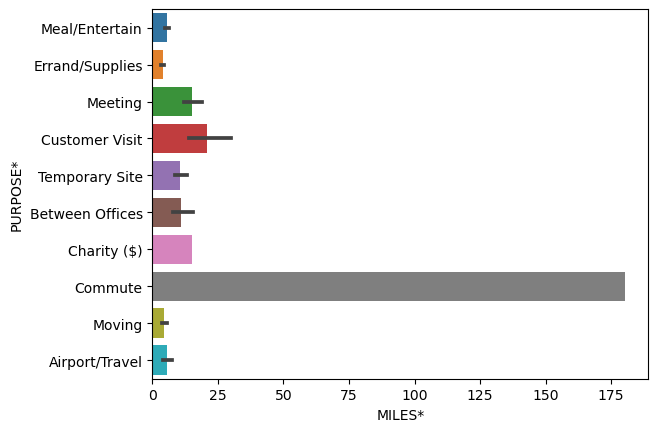

In [26]:
sns.barplot(data= df, y= 'PURPOSE*', x= 'MILES*');

Inference: Most of the uber trips are taken for Commuting from one place to another.

## Q20. Display a dataframe of Purpose and the total distance travelled for that particular Purpose. (3 points)
#### Note: Use the original dataframe without dropping "NA" values

In [27]:
data['PURPOSE*']

0        Meal/Entertain
1                   NaN
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1150            Meeting
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
Name: PURPOSE*, Length: 1155, dtype: object

In [28]:
data.groupby('PURPOSE*').sum().T

PURPOSE*,Airport/Travel,Between Offices,Charity ($),Commute,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Temporary Site
MILES*,16.5,197.0,15.1,180.2,2089.5,508.0,911.7,2851.3,18.2,523.7


## Q21. Generate a plot showing count of trips vs category of trips. What can you infer from the plot (2 +1 points)
#### Note: Use the original dataframe without dropping the 'NA' values.

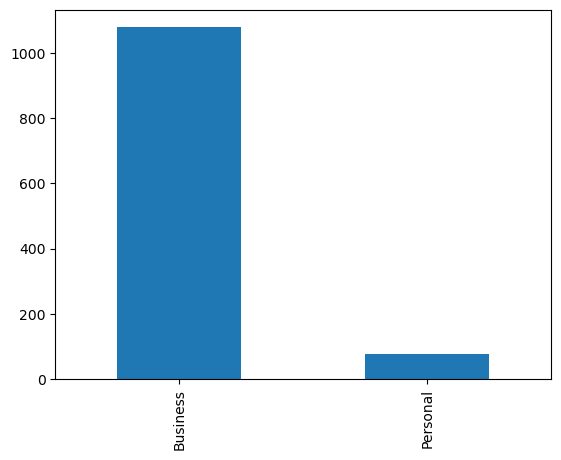

In [29]:
data['CATEGORY*'].value_counts().plot(kind= 'bar');

In [30]:
data['ROUTE*'].value_counts()

Unknown Location-Unknown Location    86
Morrisville-Cary                     75
Cary-Morrisville                     67
Cary-Cary                            53
Cary-Durham                          36
                                     ..
Chessington-Chessington               1
Meredith Townes-Harden Place          1
Cary-Holly Springs                    1
Meredith-Cedar Hill                   1
Gampaha-Ilukwatta                     1
Name: ROUTE*, Length: 361, dtype: int64

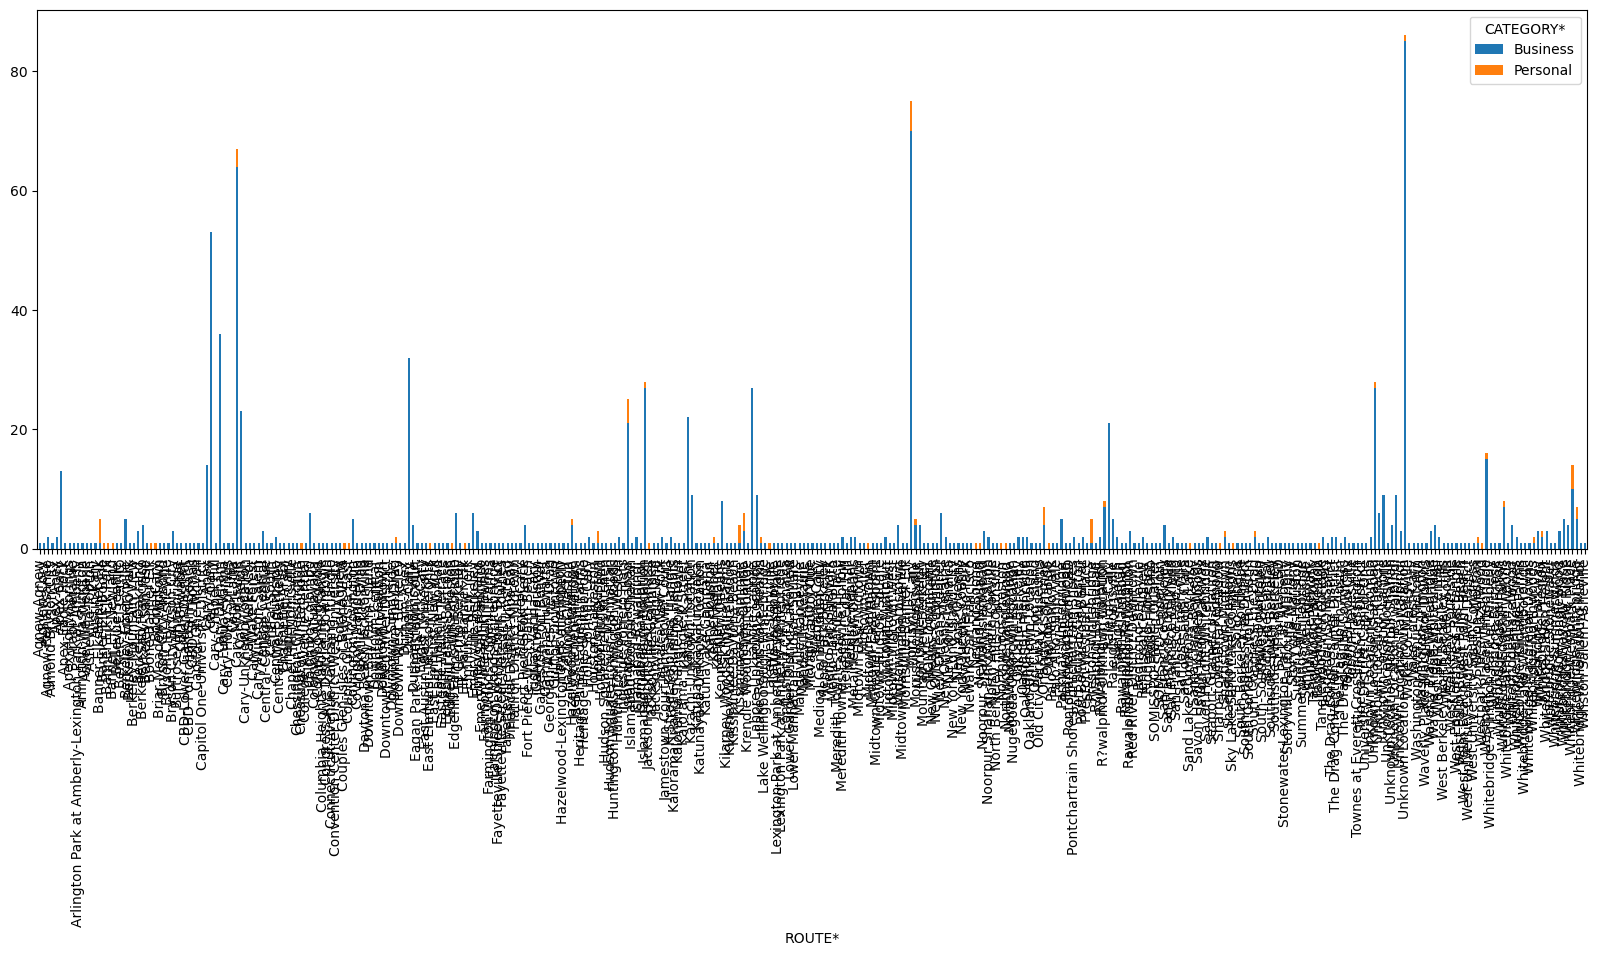

In [31]:
ct = pd.crosstab(data['ROUTE*'],data['CATEGORY*'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,7))
plt.show()

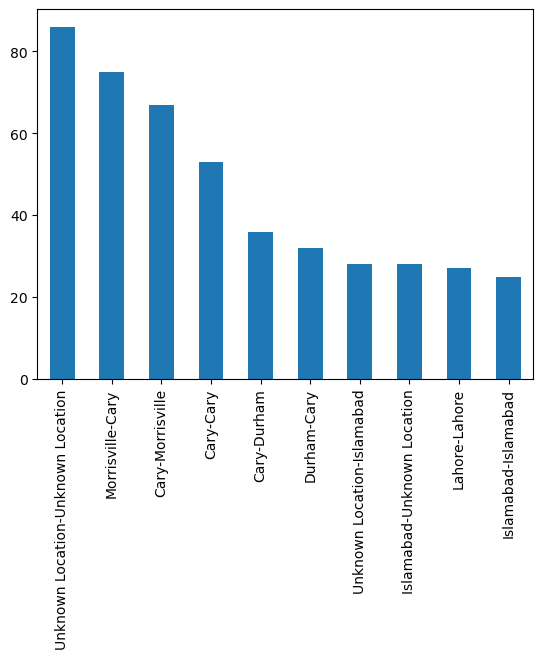

In [32]:
data['ROUTE*'].value_counts().head(10).plot(kind= 'bar');

## Q22. What percentage of Miles were clocked under Business Category and what percentage of Miles were clocked under Personal Category ? (3 points)

### Note:Use the original dataframe without dropping the 'NA' values. 


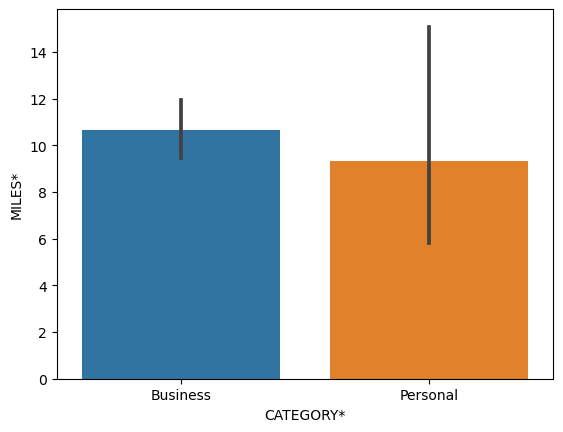

In [33]:
sns.barplot(data= data , x='CATEGORY*', y= 'MILES*');

***THE END***